<a href="https://colab.research.google.com/github/sameertipnis/AlgoTrading/blob/main/Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Agenda
1. Class feedback 
2. CAPM 
3. PCA Based trading Strategy
4. Steps for building a Quant Strategy 
5. Current Topic - Robinhood - Phantom BRK.B Trade volume last year

#CAPM

##The Capital Asset Pricing Model (CAPM) is a famous framework for pricing the returns of an asset such as a stock, with many interesting connections to the modern portfolio theory.

##Before diving into the details of the CAPM, it is important to understand the notion of risk-free assets and the market factor. A risk-free asset is essentially an asset than can give you returns at virtually no risk (e.g. a government bond). The market factor instead monitors the state of the overall stock market as a whole and is often measured through an index such as the S&P500. Generally speaking, the overall market is more volatile/risky than government bonds, but it also provides more returns to the investors.

##With those definitions in mind, let’s look at the concept of the Security Market Line (SML) from CAPM. In practice, SML decomposes the returns of a stock r_i into three main factors:

- r_f: risk-free return
- beta_i * (r_m-r_f): market factor return
- e_i: idiosyncratic return

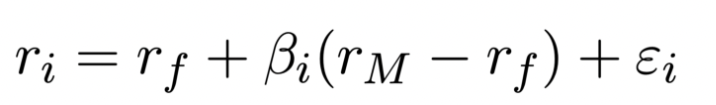

##The intuition behind this equation is that:

- return of a stock should be at least equal to the return of the risk-free asset (otherwise why take the extra risk in the first place?)

- return of the asset is also explained by the market factor, which is captured by the term (r_m-r_f) (measures the excess return of the market with respect to the risk-free asset) and beta_i (measures the degree to which the asset is affected by the market factor).

- return of a stock is also affected by idiosyncratic factors, which are stock specific factors (e.g. the earnings release of a stock affects that individual stock only, but not the overall market).

##Empirically speaking, the market factor is the primary driver of the stock market returns, as it tends to explain most of the returns of any given stock in any given day.

#PCA Based Trading Strategy

## Method to reduce dimensionality


###In a nutshell, Principal Component Analysis (PCA) decomposes the data into many vectors called principal components that essentially “summarise” the given data. More specifically, these summaries are linear combinations of the input features that try to explain as much variance in the data as possible. By convention, these principal components are ordered by the amount of variance they can explain, with the first principal component explaining most of the data.

# Link between PCA and CAPM

##Collect the S&P tickers from Wikipedia, and then from Barchart.

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 6.5 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import requests as re
from bs4 import BeautifulSoup
import pickle
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
#Looking at large cap and mid cap
id = ['sp500', 'sp400']

In [5]:
input_file = {'sp500': 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies',
              'sp400': 'https://en.wikipedia.org/wiki/List_of_S%26P_400_companies'}
              

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
output_file = {'sp500': '/content/drive/My Drive/NYU/AlgoTrading-Summer-2022/sp_data/sp500_wikipedia.pickle',
               'sp400': '/content/drive/My Drive/NYU/AlgoTrading-Summer-2022/sp_data/sp400_wikipedia.pickle'}
               

In [8]:
sp500_wikipedia = []
sp400_wikipedia = []
sp1000_wikipedia = []
sp_wikipedia = {'sp500': sp500_wikipedia,
                'sp400': sp400_wikipedia }
                

In [9]:
for i in input_file:
    
    # Get URL    
    r = re.get(input_file[i])
    
    # Create a soup object 
    soup = BeautifulSoup(r.text)
    
    # Find S&P constituents table
    # table = soup.find('table', attrs={'class', 'wikitable sortable'})
    table = soup.find('table', {"id": "constituents"})
    
    if (table is not None ):
      # Get the rows containing the tickers
      tickers = table.find_all('a', attrs={'class', 'external text'})
      # find_all returns tickers and SEC fillings, get tickers only
      tickers = tickers[::2]
    
      # Create a list containing the tickers
      for j in range(len(tickers)):
        sp_wikipedia[i].append(tickers[j].text)
        
        
    # Save the list to a file
    with open(output_file[i], 'wb') as f:
        pickle.dump(sp_wikipedia[i], f)
    f.close()

In [10]:
print(len(sp500_wikipedia))
print(len(sp400_wikipedia))


503
401


In [11]:
sp_500_prices = yf.download(sp500_wikipedia, start='2020-01-01')['Adj Close']


[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [12]:
sp_500_rs = sp_500_prices.apply(np.log).diff(1)

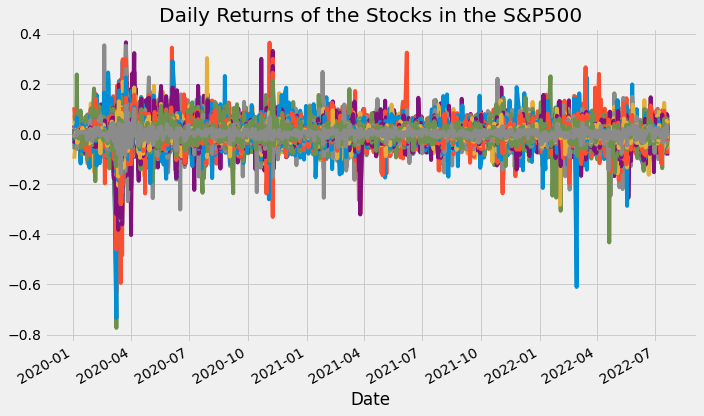

In [13]:
sp_500_rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()

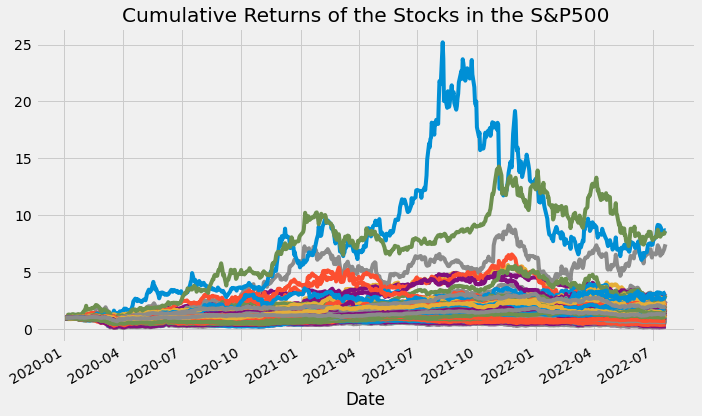

In [14]:
(sp_500_rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()

##PCA 

In [23]:
pca = PCA(1).fit(sp_500_rs.fillna(0))

In [31]:
pca_f = PCA(2).fit(sp_500_rs.fillna(0))

In [36]:
print (pca_f.)

[0.17653742 0.02631767]


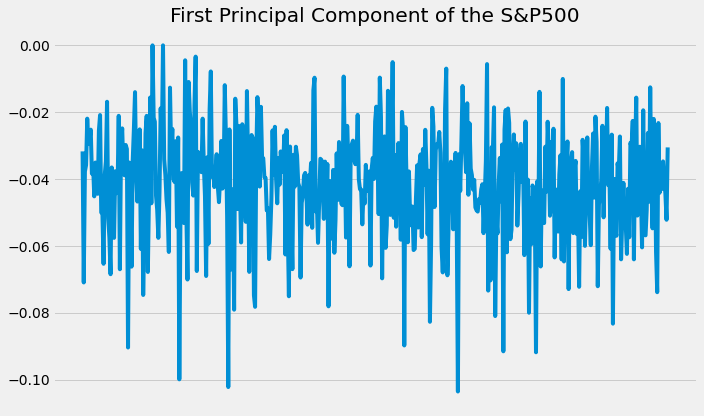

In [16]:
pc1 = pd.Series(index=sp_500_rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

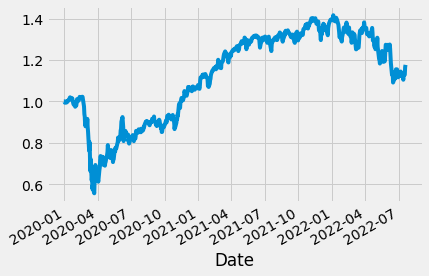

In [17]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*sp_500_rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

In [18]:
spy_prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


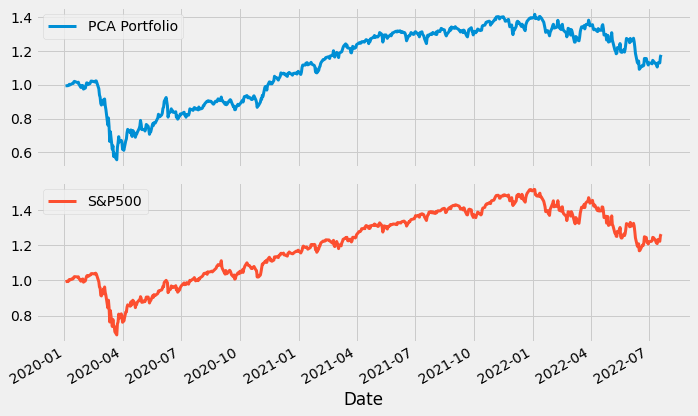

In [19]:
rs_df = pd.concat([myrs, spy_prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()

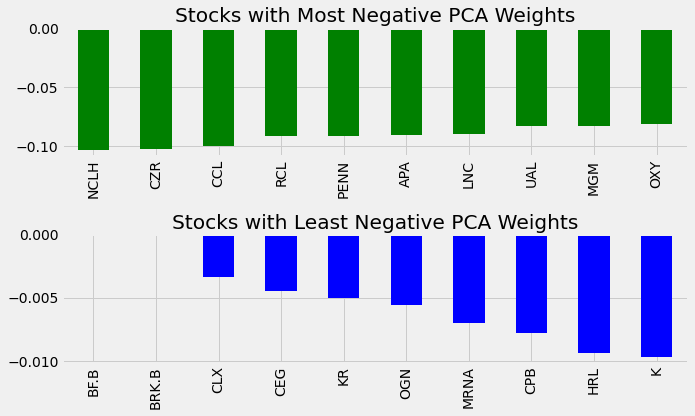

In [20]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()

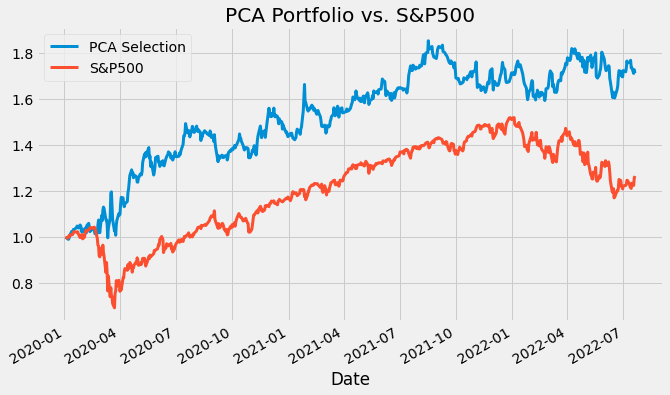

In [21]:
myrs = sp_500_rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs. S&P500')
spy_prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'S&P500'])

#How to Build a Quantitative Strategy

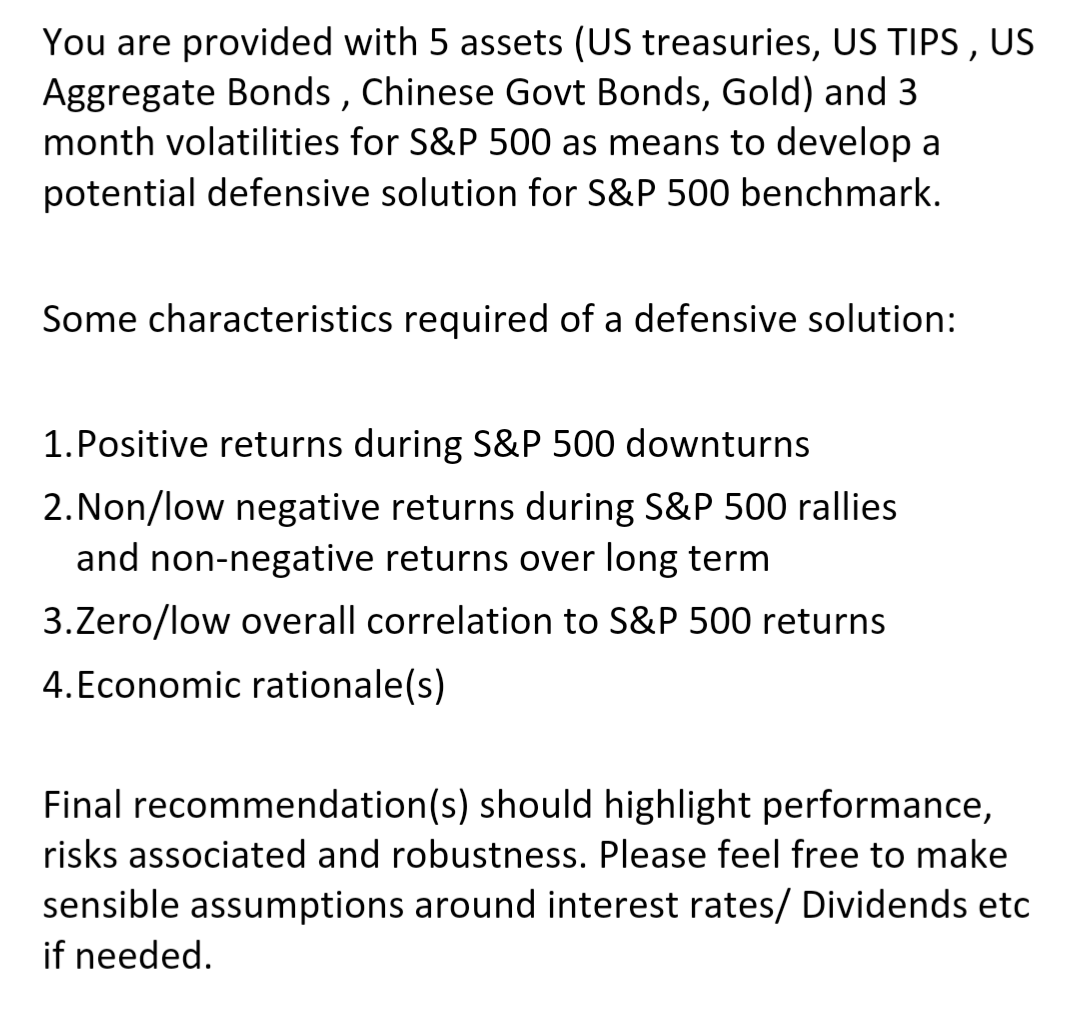

## Defensive Solution Framework 

### Take Historical returns of S&P 500 (SPY)
### Take Histoical returns of 5 portfolio assets.
### Generate a variance and covariance matrix for all the siz asset class
### Set a threshold for covariance cutoff with SPY
### Do a PCA on 5 asset classes and assign portfolio weights according to PC1
### This will give you best diversified or non correlated return

### Calibrate the portfolio everyday - hope TC does not go up too much.

#Current Topic - Robinhood - Phantom BRK.B Trade volume last year

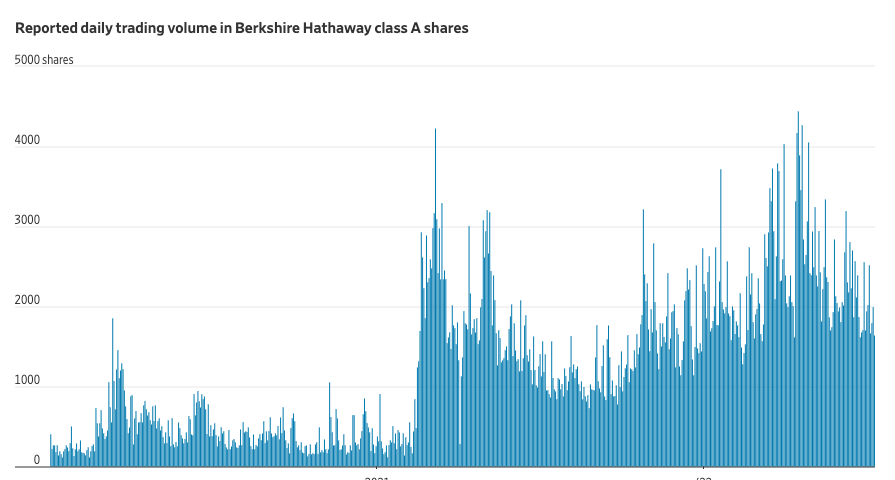

#Presentation 
## 10 min max
## Strategy Idea
## Startegy Universe 
## Model 
## Historical Performance
## Ways to improve the performance



#Machine learning 
## Supervised Learning 
## UnSupervised learning 

## Supervised learning - Regression 
## Classification - not done in the class 

## Unsupervised Learning 

#Preparing data
#Trying different Algos
# BackTesting 

# Advances In Financial Machine Learning by Marco Lopez De Prado 

#R Learning 

# Tensor 